# review raw data

* read raw data (from ndf5 file)
* apply selection criteria
* generate summary table
* visualise (plot) values


In [4]:
# need to add parent directory to sys.path...
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from IPython.display import display
from PyOptimalInterpolation import get_data_path
from PyOptimalInterpolation.dataloader import DataLoader
from PyOptimalInterpolation.utils import config_func, stats_on_vals, WGS84toEASE2_New, EASE2toWGS84_New
from PyOptimalInterpolation.plot_utils import plot_pcolormesh, plot_hist

pd.set_option('display.max_columns', 200)

# Parameters

In [6]:
# ndf file to read from
hdf_file = get_data_path("example", "ABC.h5")

table = "data"
val_col = "obs"
lon_col = "lon"
lat_col = "lat"

scatter_plot_size = 2


# Read Data

In [7]:
print("reading from hdf5 files")
# read by specifying file path
df = DataLoader.read_hdf(table=table, path=hdf_file)

print("head of data:")
print(df.head(3))

# get config used to generate file

reading from hdf5 files
head of data:
           lon        lat            datetime source      obs
420 -61.821182  65.594139 2020-02-10 00:22:20      A  0.22610
421 -61.847626  65.620234 2020-02-10 00:22:23      A  0.21440
422 -61.851806  65.624354 2020-02-10 00:22:24      A  0.09765


# stats on data

In [8]:
print("*" * 20)
print("summary / stats table on metric (use for trimming)")

vals = df[val_col].values
stats_df = stats_on_vals(vals=vals, name=val_col,
                         qs=[0.01, 0.05] + np.arange(0.1, 1.0, 0.1).tolist() + [0.95, 0.99])

# print(stats_df)
display(stats_df)

********************
summary / stats table on metric (use for trimming)


,obs
measure,NaN
size,169575.000000
num_not_nan,169575.000000
num_inf,0.000000
min,-126.251043
mean,2.331068
max,1349.194600
std,30.829791
skew,20.702468
kurtosis,518.055374


# select subset of data

In [9]:

plt_where = [
    {"col": val_col, "comp": ">=", "val": -2.0},
    {"col": val_col, "comp": "<=", "val": 2.0}
]

plt_df = DataLoader.data_select(df, where=plt_where)

plt_stats_df = stats_on_vals(vals=plt_df[val_col].values, name=val_col,
                             qs=[0.01, 0.05] + np.arange(0.1, 1.0, 0.1).tolist() + [0.95, 0.99])

display(plt_stats_df)


,obs
measure,NaN
size,163161.000000
num_not_nan,163161.000000
num_inf,0.000000
min,-1.999800
mean,0.251762
max,2.000000
std,0.373764
skew,-1.108968
kurtosis,7.585852


# plot (selected) values

In [10]:
df.head(2)

,lon,lat,datetime,source,obs
420,-61.821182,65.594139,2020-02-10 00:22:20,A,0.2261
421,-61.847626,65.620234,2020-02-10 00:22:23,A,0.2144


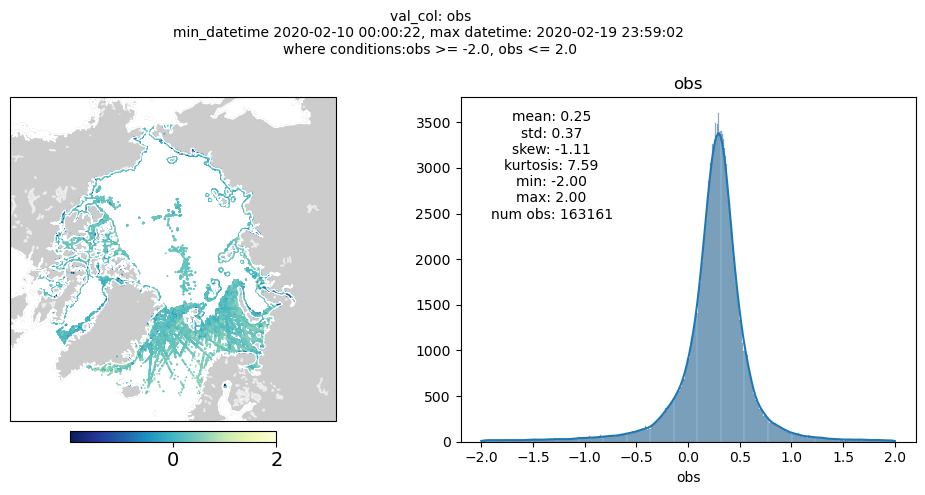

In [11]:

figsize = (10, 5)
fig = plt.figure(figsize=figsize)

# figure title
where_print = ", ".join([" ".join([str(v) for k, v in pw.items()]) for pw in plt_where])
# put data source in here?
sup_title = f"val_col: {val_col}\n" \
            f"min_datetime {str(plt_df['datetime'].min())}, " \
            f"max datetime: {str(plt_df['datetime'].max())} \n" \
            f"where conditions:" + where_print
fig.suptitle(sup_title, fontsize=10)

nrows, ncols = 1, 2

# first plot: heat map of observations
ax = fig.add_subplot(1, 2, 1,
                     projection=ccrs.NorthPolarStereo())

plot_pcolormesh(ax=ax,
                lon=plt_df[lon_col].values,
                lat=plt_df[lat_col].values,
                plot_data=plt_df[val_col].values,
                fig=fig,
                # title=plt_title,
                # vmin=vmin,
                # vmax=vmax,
                cmap='YlGnBu_r',
                # cbar_label=cbar_labels[midx],
                scatter=True,
                s=scatter_plot_size)

ax = fig.add_subplot(1, 2, 2)

plot_hist(ax=ax,
          data=plt_df[val_col].values,
          ylabel="",
          stats_values=['mean', 'std', 'skew', 'kurtosis', 'min', 'max', 'num obs'],
          title=f"{val_col}",
          xlabel=val_col,
          stats_loc=(0.2, 0.8))

plt.tight_layout()
plt.show()
